### Import Library

In [19]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Read Dataset

In [2]:
dfpumpkin = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
dfpumpkin

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


### Info Dataset

In [3]:
dfpumpkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


### Deskripsi Dataset

In [4]:
dfpumpkin.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


### Kelas

In [5]:
pd.unique(dfpumpkin['Class'])

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

### Jumlah Data Setiap Kelas

In [6]:
dfpumpkin['Class'].value_counts()

Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64

### Jumlah Setiap Kelas

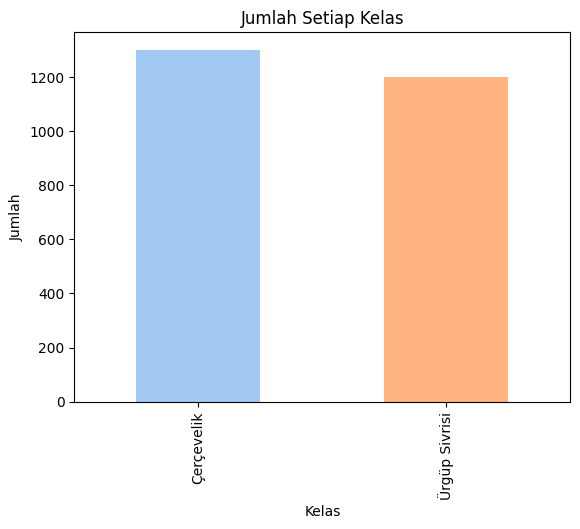

In [7]:
sns.set_palette('pastel')
dfpumpkin['Class'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))
plt.title("Jumlah Setiap Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

### Split Independent Dependent Variable

In [9]:
x = dfpumpkin.drop(['Class'], axis=1)
y = dfpumpkin['Class']
x, y

(       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
 0     56276    888.242           326.1485           220.2388        56831   
 1     76631   1068.146           417.1932           234.2289        77280   
 2     71623   1082.987           435.8328           211.0457        72663   
 3     66458    992.051           381.5638           222.5322        67118   
 4     66107    998.146           383.8883           220.4545        67117   
 ...     ...        ...                ...                ...          ...   
 2495  79637   1224.710           533.1513           190.4367        80381   
 2496  69647   1084.318           462.9416           191.8210        70216   
 2497  87994   1210.314           507.2200           222.1872        88702   
 2498  80011   1182.947           501.9065           204.7531        80902   
 2499  84934   1159.933           462.8951           234.5597        85781   
 
       Equiv_Diameter  Eccentricity  Solidity  Extent  Roundne

### Label Encoder

In [ ]:
y = dfpumpkin['Class'].values
le = LabelEncoder().fit(y)
y = le.transform(y)

### Split Train Test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Scaling Feature 

In [12]:
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Train/Fit Model

In [16]:
perceptron = Perceptron(max_iter=1000).fit(x_train, y_train)
perceptron

Perceptron()

### Predict/Test

In [17]:
y_prediction = perceptron.predict(x_test)
y_prediction

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,

Accuration Check, Classification Report, and Visual Confusion Matrix

Akurasi adalah = 82.0%


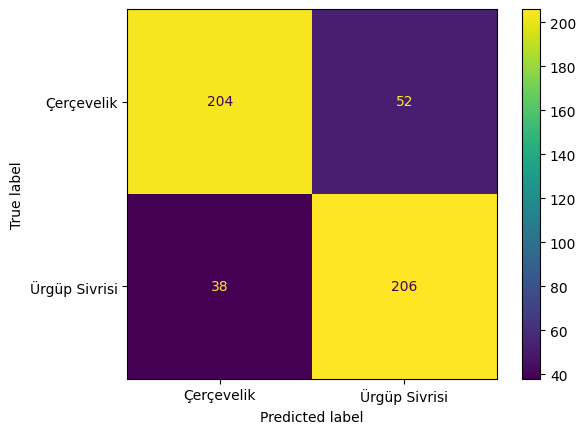

In [24]:
accuracy = accuracy_score(y_test, y_prediction)
print(f"Akurasi adalah = {accuracy*100}%")

labels = ['Çerçevelik', 'Ürgüp Sivrisi']
ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction), display_labels=labels).plot()

### Klasifikasi Data Baru

In [26]:
newdata = [[3.78633073e+04, 6.94101770e+03, 7.45462900e+02, 4.03600900e+02,
        6.01757441e+04, 6.61334400e+02, 3.02600000e-01, 9.39700000e-01,
        1.38100000e-01, 1.41900000e-01, 4.64760000e+00, 3.42600000e-01],
       [9.49420273e+04, 8.28358210e+03, 8.36905000e+02, 6.43804200e+02,
        2.65864253e+04, 7.34081400e+02, 2.69900000e-01, 2.06800000e-01,
        9.17200000e-01, 2.12700000e-01, 7.04040000e+00, 2.32300000e-01],
       [2.33427228e+04, 9.96994630e+03, 3.98046700e+02, 6.09365100e+02,
        4.56577083e+04, 5.69901000e+02, 7.60000000e-01, 6.47300000e-01,
        7.41500000e-01, 4.08400000e-01, 2.03920000e+00, 2.88300000e-01],
       [6.32206477e+04, 8.98450430e+03, 4.76735500e+02, 7.80882000e+02,
        2.38517011e+04, 6.37400000e+02, 3.75700000e-01, 8.00300000e-01,
        8.35000000e-02, 1.48800000e-01, 4.50830000e+00, 3.75900000e-01],
       [8.49340000e+04, 1.15993300e+03, 4.62895100e+02, 2.34559700e+02,
        8.57810000e+04, 3.28848500e+02, 8.62100000e-01, 9.90100000e-01,
        7.36000000e-01, 7.93300000e-01, 1.97350000e+00, 7.10400000e-01]]

newpredict = perceptron.predict(newdata)
inverse = le.inverse_transform(newpredict)

for i in range(len(newdata)):
    print(f"Prediksi Data Baru ke-{i + 1}: {inverse[i]}")


Prediksi Data Baru ke-1: Ürgüp Sivrisi
Prediksi Data Baru ke-2: Ürgüp Sivrisi
Prediksi Data Baru ke-3: Ürgüp Sivrisi
Prediksi Data Baru ke-4: Ürgüp Sivrisi
Prediksi Data Baru ke-5: Ürgüp Sivrisi


### Save Model with Pickle

In [17]:
with open("perceptronpumpkin.pkl", "wb") as file:
    pickle.dump(perceptron, file)